# Plotting with Matplotlib

Matplotlib is a standard plotting library of python. We begin by importing it first along with numpy.

In [6]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

The most widely used function in `matplotlib` is plot, which allows you to plot 1D and 2D data. Here is a simple example:

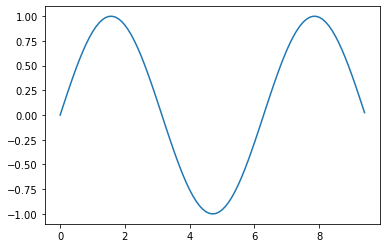

In [2]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)

We can easily customize the style of plots for poster/talk/paper

In [3]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


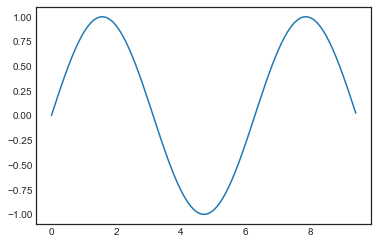

In [4]:
plt.style.use(['seaborn-white'])
plt.plot(x, y)

if we want to customize plots it is better to plot by first defining fig and ax objecs which have manuy methods for customizing figure resolution and plot related aspects respecticely. 

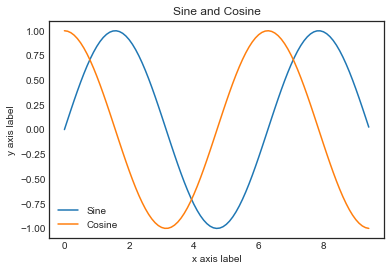

In [5]:
fig, ax = plt.subplots()

y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
ax.plot(x, y_sin)
ax.plot(x, y_cos)

# Specify labels
ax.set_xlabel('x axis label')
ax.set_ylabel('y axis label')
ax.set_title('Sine and Cosine')
ax.legend(['Sine', 'Cosine'])

#fig.savefig("myfig.pdf")

## A gallery of useful examples

**For a greater variety of plotting examples check out [Matploltib Gallery!](https://matplotlib.org/3.1.1/gallery/index.html)**

1D plotting is conveniently done by creating fig and ax objects which allow coutom styling plots and figure properties separately. 

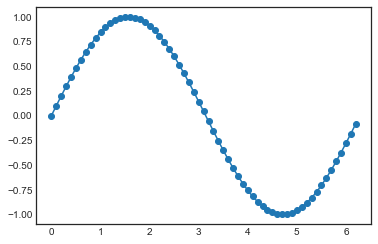

In [6]:
fig, ax = plt.subplots()          # Create fig and ax objects

t = np.arange(0.0,  2*np.pi, 0.1) # create x values via np.arange or np.linspace

s = np.sin(t)                     # create y values

ax.plot(t, s, '-o')                     # make the plot

#fig.savefig('myFIG.png')         # save figure

#### fig and ax objects
For customizing plots it is more convenient to define **fig** and **ax** objects.  One can then use ax object to make veriety of subplots then use fig to save the entire figure as one pdf. Try changing fig size, number of columns and rows.

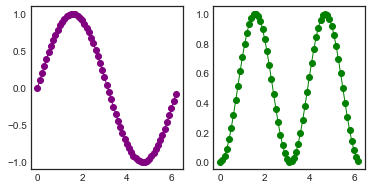

In [7]:
t = np.arange(0.0,  2*np.pi, 0.1) # create x values
s = np.sin(t)                     # create y values

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(6,3))          

ax[0].plot(t, s,'-o', color='purple', lw=1.0)  # plot on subplot-1
ax[1].plot(t, s**2,'-o', color='green',  lw=1.0)  # plot  on subplot-2

#fig.savefig('sd.png')             # save the figure

### Plotting in 2D

To make 2D plots we need to generate 2D grid $(x,y)$ of points and pass it to our function $f(x,y)$

$$f(x,y) = sin(x) \cdot cos(x) \,\,\,$$

<ipython-input-8-5871cfed40af>:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolor(X, Y, Z,cmap='RdBu')                  # plot


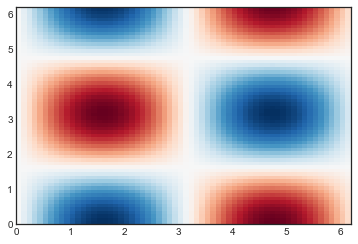

In [8]:
x = np.arange(0.0,  2*np.pi, 0.1)   # create x values
y = np.arange(0.0,  2*np.pi, 0.1)   # create y values

X, Y = np.meshgrid(x,y)             # tunring 1D array into 2D grids of x and y values

Z = np.sin(X) * np.cos(Y)           # feed 2D grids to our 2D function f(x,y)

fig, ax = plt.subplots()            # Create fig and ax objects
ax.pcolor(X, Y, Z,cmap='RdBu')                  # plot 

# try also ax.contour, ax.contourf

### 3D plots with matplotlib

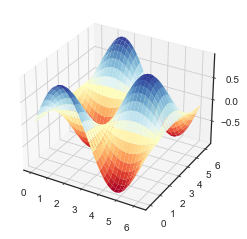

In [9]:
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D

# Create fig and ax objects for 3d plotting
fig = plt.figure()
ax = fig.add_subplot(projection='3d')  

# Using X,Y,Z grid of points in previous step 
ax.plot_surface(X, Y, Z, cmap='RdYlBu')

### Plotting histograms with matplotlib

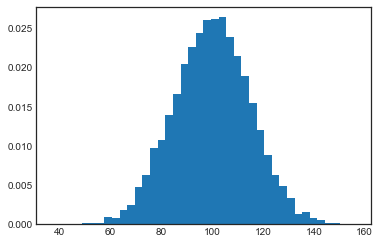

In [10]:
fig, ax = plt.subplots()

# Make up some random data
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# Plot 1D histogram of the data
hist = ax.hist(x, bins=40, density=True)

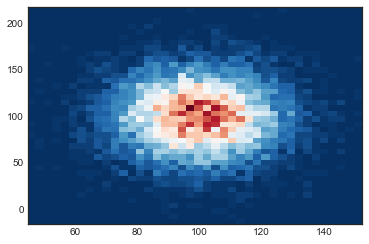

In [11]:
fig, ax = plt.subplots()

# Make up some random data
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)
y = mu + 2*sigma * np.random.randn(10000)

# Plot 2D histogram of the data
hist = ax.hist2d(x, y, bins=40, density=True, cmap='RdBu_r')

### Plotting histograms with seaborn

For visualizing statistical plots there is a specialized library build on top of matplotlib that simplifies many intermediate steps that are needed to go from data to beautiful and polished visualization. 

- [Seaborn](https://seaborn.pydata.org/index.html)

In [12]:
import seaborn as sns
from scipy import stats

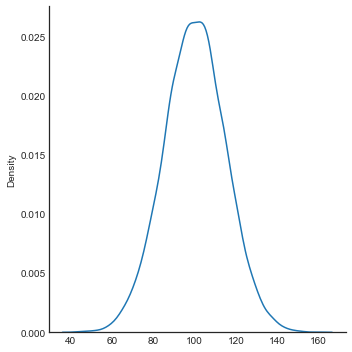

In [13]:
# Make up some random data
mu, sigma = 100, 15

x = mu + sigma * np.random.randn(10000)

sns.displot(x, kind="kde")

## Pandas and seaborn! a power couple for multivariate statistics visualization

In [7]:
# Normal distribution of points 
n_points=200

df = pd.DataFrame({ 'X':    1*np.random.randn(n_points), 
                    'Y':    5*np.random.randn(n_points), 
                    'Z':    1+5*np.random.randn(n_points),
                    'time': np.linspace(0,n_points,n_points)
                  })

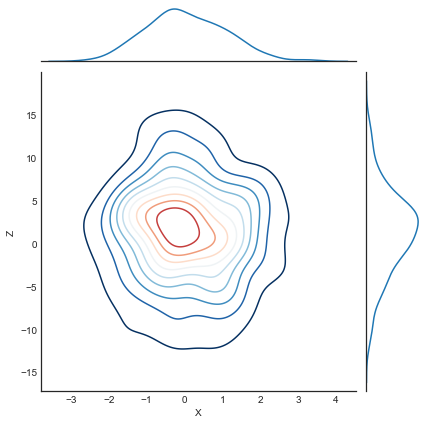

In [67]:
sns.jointplot(data=df, x='X', y='Z',
              kind="kde", cmap='RdBu_r')

## Interactive plots

### Using widgets

Suppose we would like to explore how the variation of parameter $\lambda$ affects the following function of a standing wave:

$$
f(x) = sin \Big(\frac{2\pi x}{\lambda}\Big)
$$

**Step 1** Make a python-function which creates a plot as a function of a parameter(s) of interest.

**Step 2** Add an interactive widget on top to vary the parameter.

In [68]:
from ipywidgets import widgets

In [69]:
@widgets.interact(L=(1,12))    # Vary between 0.2 and 20

def wave(L=1):          # We make default value equal to 1
    
    x=np.linspace(-10,10,1000)
        
    f = np.sin(2*np.pi*x/L)
        
    plt.plot(x,f, lw=2, color='blue')

interactive(children=(IntSlider(value=1, description='L', max=12, min=1), Output()), _dom_classes=('widget-int…

## More interactiviy via  Plotly-express

- [Plotly](https://plotly.com/python/) is large multi-language  interactive graphing library that covers Python/Julia/R. 

- [Plotly-dash](https://dash.plotly.com/introduction) is a framework for building web dashborads with itneractive plotly graphs.

- [Plotly-express](https://plotly.com/python-api-reference/plotly.express.html) is a high level library for quick visualizations whihc is similiar to seaborn vs matploltib in its philosophy

> Check out [this cool website](https://biapss.chem.iastate.edu/) built using Dash-Plotly

In [70]:
import plotly.express as px

In [71]:
px.density_heatmap(df, x='X', y='Y')
#px.line(df, x='X', y='Y')
#px.scatter(df, x='X', y='Y')
#px.area(df, x='X', y='Y')
#px.histogram(df, x="X")

In [74]:
fig = px.scatter(df, x="X", y="Y", size=20*np.ones(n_points), 
                 animation_frame="time", animation_group='Y', color='Y',
                 range_x=[-20,20], range_y=[-20,20]
                 )
fig.show()

### Too many libraries for visualization in pyviz universe? Enter Holoviews!

We all can agree there are just too many options for visualizing data and sometimes it is impossible to pick one and stick with becaue different libaries have different strengths when it comes visualizing different kinds of data. Plotly does a gread job with 3D visualization while matploltib is mostly desinged for 2D plots. Seaborn has everying one needs to genreate statistical plots while plotly may cover ony a subgroup of seaborn, etc. One emerging idea in scientific software desing is to create library agnostic tools. E.g if you want to plot histogram you can do it either using several different libraries or using a library agnsotic tool by specifiying the particular library interface for the visualization. 

- [Holoviews](http://holoviews.org/#) A library agnostic tool living in python universe for high level visualizations. 

- [Example of Holoviews Elements](http://holoviews.org/reference/index.html)

"Stop plotting your data - annotate your data and let it visualize itself" 

In [90]:
# May have to run this in GoogleCollab to show the plots
#!pip install -q holoviews 

In [91]:
import holoviews as hv
hv.extension('plotly') # try 'bokeh' or 'matplotlib'

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [92]:
data = df[['X', 'Y']].values
#hv.Curve(data)
hv.Scatter(data) + hv.Curve(data) + hv.Points(data) + hv.Bivariate(data)
#hv.Histogram(df['X'], density=True, bins=50)

:Layout
   .Scatter.I   :Scatter   [x]   (y)
   .Curve.I     :Curve   [x]   (y)
   .Points.I    :Points   [x,y]
   .Bivariate.I :Bivariate   [x,y]   (Density)

(40, 40)

In [105]:
#Example of 3D plot

Z = np.sin( np.random.randn(40,40) )**5

hv.Surface(Z, bounds=(-5, -5, 5, 5))

:Surface   [x,y]   (z)

In [89]:
def wave(L=0, phi=0, a=1):          # We make default value equal to 1
    
    x=np.linspace(-10,10,1000)
        
    return hv.Curve((x, a*np.sin(2*np.pi*x/L+phi)))

hv.DynamicMap(wave, kdims=['a', 'L', 'phi']).redim.range(a=(0,2), L=(0.5,1), phi=(0,1))

:DynamicMap   [a,L,phi]
   :Curve   [x]   (y)

## Additional resoruces. 

Matplotlib has a huge scientific user base. This means that you can always find a good working template of any kind of visualization which you want to make. With basic understanding of matplotlib and some solid googling skills you can go very far. Here are some additional resources that you may find helpful

- [Matplotlib](https://matplotlib.org/index.html)

- [Matplotlib gallery](https://matplotlib.org/3.1.1/gallery/index.html)

- [Matplotlib Blog](https://matplotlib.org/matplotblog/)

- [PyViz universe](https://pyviz.org/index.html)

- [The Python Graph Gallery](https://python-graph-gallery.com/)

- [Plotly documentaiton](https://plotly.com/python/)